# Data cleaning

In [1]:
import numpy as np
import pandas as pd
import os

dfs = {}
for dirname, _, filenames in os.walk('/kaggle/input/ids-intrusion-csv/'):
    for filename in filenames:
        # Reading 02-20-2018.csv takes too much RAM, we may leave this subset out
        if (filename != "02-20-2018.csv"):
            dfs[filename.split('.')[0]] = pd.read_csv(os.path.join(dirname, filename))
            print("Completed reading to dataframe: " + os.path.join(dirname, filename))

/tmp/ipykernel_48/182212663.py:10: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[filename.split('.')[0]] = pd.read_csv(os.path.join(dirname, filename))


Completed reading to dataframe: /kaggle/input/ids-intrusion-csv/02-28-2018.csv


/tmp/ipykernel_48/182212663.py:10: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[filename.split('.')[0]] = pd.read_csv(os.path.join(dirname, filename))


Completed reading to dataframe: /kaggle/input/ids-intrusion-csv/03-01-2018.csv


/tmp/ipykernel_48/182212663.py:10: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[filename.split('.')[0]] = pd.read_csv(os.path.join(dirname, filename))


Completed reading to dataframe: /kaggle/input/ids-intrusion-csv/02-16-2018.csv
Completed reading to dataframe: /kaggle/input/ids-intrusion-csv/02-15-2018.csv
Completed reading to dataframe: /kaggle/input/ids-intrusion-csv/02-21-2018.csv
Completed reading to dataframe: /kaggle/input/ids-intrusion-csv/03-02-2018.csv
Completed reading to dataframe: /kaggle/input/ids-intrusion-csv/02-22-2018.csv
Completed reading to dataframe: /kaggle/input/ids-intrusion-csv/02-14-2018.csv
Completed reading to dataframe: /kaggle/input/ids-intrusion-csv/02-23-2018.csv


In [2]:
# Drop Timestamp column
for key in dfs.keys():
    df = dfs[key]
    df.drop(["Timestamp"], axis="columns", inplace=True)

In [3]:
for key in dfs.keys():
    df = dfs[key]
    for col in df.columns:
        # If column type is object, there is mixed type
        if df[col].dtype == 'object' and col != 'Label':
            # Change all values to numeric, and to NaN if it is a strig
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df.dropna(inplace=True)
    print("Completed dropping rows with invalid values (NaN) from dataframe: " + key)
    display(df.info())    

Completed dropping rows with invalid values (NaN) from dataframe: 02-28-2018
<class 'pandas.core.frame.DataFrame'>
Index: 609030 entries, 0 to 613103
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           609030 non-null  float64
 1   Protocol           609030 non-null  float64
 2   Flow Duration      609030 non-null  float64
 3   Tot Fwd Pkts       609030 non-null  float64
 4   Tot Bwd Pkts       609030 non-null  float64
 5   TotLen Fwd Pkts    609030 non-null  float64
 6   TotLen Bwd Pkts    609030 non-null  float64
 7   Fwd Pkt Len Max    609030 non-null  float64
 8   Fwd Pkt Len Min    609030 non-null  float64
 9   Fwd Pkt Len Mean   609030 non-null  float64
 10  Fwd Pkt Len Std    609030 non-null  float64
 11  Bwd Pkt Len Max    609030 non-null  float64
 12  Bwd Pkt Len Min    609030 non-null  float64
 13  Bwd Pkt Len Mean   609030 non-null  float64
 14  Bwd Pkt Len Std    609030 no

None

Completed dropping rows with invalid values (NaN) from dataframe: 03-01-2018
<class 'pandas.core.frame.DataFrame'>
Index: 329266 entries, 0 to 331111
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           329266 non-null  float64
 1   Protocol           329266 non-null  float64
 2   Flow Duration      329266 non-null  float64
 3   Tot Fwd Pkts       329266 non-null  float64
 4   Tot Bwd Pkts       329266 non-null  float64
 5   TotLen Fwd Pkts    329266 non-null  float64
 6   TotLen Bwd Pkts    329266 non-null  float64
 7   Fwd Pkt Len Max    329266 non-null  float64
 8   Fwd Pkt Len Min    329266 non-null  float64
 9   Fwd Pkt Len Mean   329266 non-null  float64
 10  Fwd Pkt Len Std    329266 non-null  float64
 11  Bwd Pkt Len Max    329266 non-null  float64
 12  Bwd Pkt Len Min    329266 non-null  float64
 13  Bwd Pkt Len Mean   329266 non-null  float64
 14  Bwd Pkt Len Std    329266 no

None

Completed dropping rows with invalid values (NaN) from dataframe: 02-16-2018
<class 'pandas.core.frame.DataFrame'>
Index: 1048574 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048574 non-null  float64
 1   Protocol           1048574 non-null  float64
 2   Flow Duration      1048574 non-null  float64
 3   Tot Fwd Pkts       1048574 non-null  float64
 4   Tot Bwd Pkts       1048574 non-null  float64
 5   TotLen Fwd Pkts    1048574 non-null  float64
 6   TotLen Bwd Pkts    1048574 non-null  float64
 7   Fwd Pkt Len Max    1048574 non-null  float64
 8   Fwd Pkt Len Min    1048574 non-null  float64
 9   Fwd Pkt Len Mean   1048574 non-null  float64
 10  Fwd Pkt Len Std    1048574 non-null  float64
 11  Bwd Pkt Len Max    1048574 non-null  float64
 12  Bwd Pkt Len Min    1048574 non-null  float64
 13  Bwd Pkt Len Mean   1048574 non-null  float64
 14  Bwd Pkt Le

None

Completed dropping rows with invalid values (NaN) from dataframe: 02-15-2018
<class 'pandas.core.frame.DataFrame'>
Index: 1043654 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1043654 non-null  int64  
 1   Protocol           1043654 non-null  int64  
 2   Flow Duration      1043654 non-null  int64  
 3   Tot Fwd Pkts       1043654 non-null  int64  
 4   Tot Bwd Pkts       1043654 non-null  int64  
 5   TotLen Fwd Pkts    1043654 non-null  int64  
 6   TotLen Bwd Pkts    1043654 non-null  int64  
 7   Fwd Pkt Len Max    1043654 non-null  int64  
 8   Fwd Pkt Len Min    1043654 non-null  int64  
 9   Fwd Pkt Len Mean   1043654 non-null  float64
 10  Fwd Pkt Len Std    1043654 non-null  float64
 11  Bwd Pkt Len Max    1043654 non-null  int64  
 12  Bwd Pkt Len Min    1043654 non-null  int64  
 13  Bwd Pkt Len Mean   1043654 non-null  float64
 14  Bwd Pkt Le

None

Completed dropping rows with invalid values (NaN) from dataframe: 02-21-2018
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Flow Duration      1048575 non-null  int64  
 3   Tot Fwd Pkts       1048575 non-null  int64  
 4   Tot Bwd Pkts       1048575 non-null  int64  
 5   TotLen Fwd Pkts    1048575 non-null  int64  
 6   TotLen Bwd Pkts    1048575 non-null  int64  
 7   Fwd Pkt Len Max    1048575 non-null  int64  
 8   Fwd Pkt Len Min    1048575 non-null  int64  
 9   Fwd Pkt Len Mean   1048575 non-null  float64
 10  Fwd Pkt Len Std    1048575 non-null  float64
 11  Bwd Pkt Len Max    1048575 non-null  int64  
 12  Bwd Pkt Len Min    1048575 non-null  int64  
 13  Bwd Pkt Len Mean   1048575 non-null  float64
 14  Bwd P

None

Completed dropping rows with invalid values (NaN) from dataframe: 03-02-2018
<class 'pandas.core.frame.DataFrame'>
Index: 1046017 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1046017 non-null  int64  
 1   Protocol           1046017 non-null  int64  
 2   Flow Duration      1046017 non-null  int64  
 3   Tot Fwd Pkts       1046017 non-null  int64  
 4   Tot Bwd Pkts       1046017 non-null  int64  
 5   TotLen Fwd Pkts    1046017 non-null  int64  
 6   TotLen Bwd Pkts    1046017 non-null  float64
 7   Fwd Pkt Len Max    1046017 non-null  int64  
 8   Fwd Pkt Len Min    1046017 non-null  int64  
 9   Fwd Pkt Len Mean   1046017 non-null  float64
 10  Fwd Pkt Len Std    1046017 non-null  float64
 11  Bwd Pkt Len Max    1046017 non-null  int64  
 12  Bwd Pkt Len Min    1046017 non-null  int64  
 13  Bwd Pkt Len Mean   1046017 non-null  float64
 14  Bwd Pkt Le

None

Completed dropping rows with invalid values (NaN) from dataframe: 02-22-2018
<class 'pandas.core.frame.DataFrame'>
Index: 1045006 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1045006 non-null  int64  
 1   Protocol           1045006 non-null  int64  
 2   Flow Duration      1045006 non-null  int64  
 3   Tot Fwd Pkts       1045006 non-null  int64  
 4   Tot Bwd Pkts       1045006 non-null  int64  
 5   TotLen Fwd Pkts    1045006 non-null  int64  
 6   TotLen Bwd Pkts    1045006 non-null  int64  
 7   Fwd Pkt Len Max    1045006 non-null  int64  
 8   Fwd Pkt Len Min    1045006 non-null  int64  
 9   Fwd Pkt Len Mean   1045006 non-null  float64
 10  Fwd Pkt Len Std    1045006 non-null  float64
 11  Bwd Pkt Len Max    1045006 non-null  int64  
 12  Bwd Pkt Len Min    1045006 non-null  int64  
 13  Bwd Pkt Len Mean   1045006 non-null  float64
 14  Bwd Pkt Le

None

Completed dropping rows with invalid values (NaN) from dataframe: 02-14-2018
<class 'pandas.core.frame.DataFrame'>
Index: 1046298 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1046298 non-null  int64  
 1   Protocol           1046298 non-null  int64  
 2   Flow Duration      1046298 non-null  int64  
 3   Tot Fwd Pkts       1046298 non-null  int64  
 4   Tot Bwd Pkts       1046298 non-null  int64  
 5   TotLen Fwd Pkts    1046298 non-null  int64  
 6   TotLen Bwd Pkts    1046298 non-null  int64  
 7   Fwd Pkt Len Max    1046298 non-null  int64  
 8   Fwd Pkt Len Min    1046298 non-null  int64  
 9   Fwd Pkt Len Mean   1046298 non-null  float64
 10  Fwd Pkt Len Std    1046298 non-null  float64
 11  Bwd Pkt Len Max    1046298 non-null  int64  
 12  Bwd Pkt Len Min    1046298 non-null  int64  
 13  Bwd Pkt Len Mean   1046298 non-null  float64
 14  Bwd Pkt Le

None

Completed dropping rows with invalid values (NaN) from dataframe: 02-23-2018
<class 'pandas.core.frame.DataFrame'>
Index: 1044821 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1044821 non-null  int64  
 1   Protocol           1044821 non-null  int64  
 2   Flow Duration      1044821 non-null  int64  
 3   Tot Fwd Pkts       1044821 non-null  int64  
 4   Tot Bwd Pkts       1044821 non-null  int64  
 5   TotLen Fwd Pkts    1044821 non-null  int64  
 6   TotLen Bwd Pkts    1044821 non-null  int64  
 7   Fwd Pkt Len Max    1044821 non-null  int64  
 8   Fwd Pkt Len Min    1044821 non-null  int64  
 9   Fwd Pkt Len Mean   1044821 non-null  float64
 10  Fwd Pkt Len Std    1044821 non-null  float64
 11  Bwd Pkt Len Max    1044821 non-null  int64  
 12  Bwd Pkt Len Min    1044821 non-null  int64  
 13  Bwd Pkt Len Mean   1044821 non-null  float64
 14  Bwd Pkt Le

None

In [4]:
for key in dfs.keys():
    df = dfs[key]
    df.replace([-np.inf, np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    print("Completed dropping rows with invalid values (-inf, inf) from dataframe: " + key)

Completed dropping rows with invalid values (-inf, inf) from dataframe: 02-28-2018
Completed dropping rows with invalid values (-inf, inf) from dataframe: 03-01-2018
Completed dropping rows with invalid values (-inf, inf) from dataframe: 02-16-2018
Completed dropping rows with invalid values (-inf, inf) from dataframe: 02-15-2018
Completed dropping rows with invalid values (-inf, inf) from dataframe: 02-21-2018
Completed dropping rows with invalid values (-inf, inf) from dataframe: 03-02-2018
Completed dropping rows with invalid values (-inf, inf) from dataframe: 02-22-2018
Completed dropping rows with invalid values (-inf, inf) from dataframe: 02-14-2018
Completed dropping rows with invalid values (-inf, inf) from dataframe: 02-23-2018


In [5]:
# No column with duplicate value. Skip this step.

# dropped_columns = {}

# for key in dfs.keys():
#     df = dfs[key]
#     # Array of booleans where dropped[i] is True if the i-th column of df contains the same value
#     dropped = [(col[0] == col).all() for _, col in df.items()]
#     # Collect columns that have been dropped for duplicate value
#     dropped_columns[key] = ((df.columns).where(dropped, np.nan)).dropna()
#     # Drop columns with duplicate value
#     df = df.loc[:, [not e for e in dropped]]
#     print("Completed dropping columns with duplicate value from dataframe: " + key)
    
# print(dropped_columns)

# Data transformation

In [6]:
outp = {}
for key in dfs.keys():
    df = dfs[key]
    outp[key] = df["Label"]
    
print(outp)

{'02-28-2018': 0                Benign
1                Benign
2                Benign
3                Benign
4                Benign
              ...      
613099    Infilteration
613100    Infilteration
613101           Benign
613102    Infilteration
613103    Infilteration
Name: Label, Length: 606902, dtype: object, '03-01-2018': 0         Benign
1         Benign
2         Benign
3         Benign
4         Benign
           ...  
331107    Benign
331108    Benign
331109    Benign
331110    Benign
331111    Benign
Name: Label, Length: 328181, dtype: object, '02-16-2018': 0                            Benign
1                            Benign
2                            Benign
3                            Benign
4                            Benign
                     ...           
1048570    DoS attacks-SlowHTTPTest
1048571    DoS attacks-SlowHTTPTest
1048572    DoS attacks-SlowHTTPTest
1048573    DoS attacks-SlowHTTPTest
1048574    DoS attacks-SlowHTTPTest
Name: Label, Length: 1

In [7]:
from sklearn import preprocessing

# Normalize data except for Label column
inp = {}
for key in dfs.keys():
    df = dfs[key]
    inp[key] = preprocessing.normalize(df.drop("Label", axis="columns"))
    inp[key] = pd.DataFrame(inp[key], columns=(df.drop("Label", axis="columns")).columns)
    
for key in inp.keys():
    dat = inp[key]
    display(dat.head())

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.001421,0.000019,0.303664,0.000019,0.000022,0.002271,0.011927,0.001241,0.0,0.000379,...,0.000010,0.000064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.032213,0.000436,0.014979,0.000145,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.001454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001179,0.000016,0.438659,0.000008,0.000003,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001390,0.000019,0.321385,0.000019,0.000022,0.002221,0.011666,0.001214,0.0,0.000370,...,0.000009,0.000063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.026134,0.000354,0.009852,0.000118,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.001180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.000000e+00,0.000000e+00,0.529288,2.295106e-08,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.008319,0.0,0.008319,0.008319,0.260265,0.027587,0.280003,0.240986
1,0.000000e+00,0.000000e+00,0.301500,9.885655e-09,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.301512,0.000000,0.301512,0.301512
2,6.088953e-07,1.544958e-07,0.555722,4.543995e-08,0.0,0.000014,0.0,0.000003,0.000003,0.000003,...,3.635196e-08,7.270392e-08,0.032089,0.0,0.032089,0.032089,0.174489,0.113600,0.296268,0.072701
3,0.000000e+00,0.000000e+00,0.301500,9.885654e-09,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.301512,0.000000,0.301512,0.301512
4,0.000000e+00,0.000000e+00,0.347582,1.681914e-08,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.005606,0.0,0.005606,0.005606,0.341989,0.000000,0.341989,0.341989


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.000000,0.000000e+00,0.484800,1.291184e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.242312,5.964965e-07,0.242312,0.242312
1,0.000000,0.000000e+00,0.484803,1.291181e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.242312,1.135167e-06,0.242312,0.242312
2,0.000837,1.409680e-07,0.488316,5.403773e-07,0.000001,0.000057,0.000032,0.000006,0.000002,0.000002,...,5.168826e-07,4.698933e-07,0.061667,0.0,0.061667,0.061667,0.212820,0.000000e+00,0.212820,0.212820
3,0.000000,0.000000e+00,0.484800,1.291184e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.242312,3.530285e-07,0.242312,0.242312
4,0.000169,4.415582e-05,0.000147,7.359304e-06,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,1.471861e-04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.000000e+00,0.000000e+00,0.485071,1.291902e-08,0.000000e+00,0.000000,0.00000,0.000000,0.0,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.242536,0.000003,0.242538,0.242533
1,2.967254e-07,8.092510e-08,0.503985,1.888252e-07,1.618502e-07,0.000029,0.00004,0.000010,0.0,0.000002,...,1.079001e-07,4.316006e-07,0.013816,0.008754,0.021596,0.004337,0.154179,0.049162,0.210640,0.120851
2,3.735257e-01,4.716829e-05,0.004269,1.572276e-05,0.000000e+00,0.000503,0.00000,0.000503,0.0,0.000252,...,0.000000e+00,2.515642e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000e+00,0.000000e+00,0.485071,1.291908e-08,0.000000e+00,0.000000,0.00000,0.000000,0.0,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.242536,0.000002,0.242537,0.242535
4,0.000000e+00,0.000000e+00,0.485071,1.291906e-08,0.000000e+00,0.000000,0.00000,0.000000,0.0,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.242536,0.000003,0.242538,0.242533


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.001094,8.201603e-05,0.518792,6.834669e-05,0.000041,0.001845,0.001736,0.001845,0.000000,0.000369,...,1.366934e-05,4.374188e-04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000002,6.813245e-08,0.471210,1.202337e-08,0.000000,0.000006,0.000000,0.000002,0.000002,0.000002,...,8.015582e-09,3.206233e-08,0.000000,0.0,0.000000,0.000000,0.235658,0.095385,0.302989,0.168327
2,0.000002,6.813245e-08,0.471210,1.202337e-08,0.000000,0.000006,0.000000,0.000002,0.000002,0.000002,...,8.015582e-09,3.206233e-08,0.000000,0.0,0.000000,0.000000,0.235658,0.095385,0.302989,0.168327
3,0.000002,8.181692e-08,0.480044,2.406380e-08,0.000000,0.000012,0.000000,0.000002,0.000002,0.000002,...,1.925104e-08,3.850208e-08,0.019252,0.0,0.019252,0.019252,0.153527,0.182404,0.363845,0.034654
4,0.000002,8.181692e-08,0.480044,2.406380e-08,0.000000,0.000012,0.000000,0.000002,0.000002,0.000002,...,1.925104e-08,3.850208e-08,0.019252,0.0,0.019252,0.019252,0.153527,0.182404,0.363845,0.034654


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.001349,0.000018,0.430625,0.000027,0.000021,0.001684,0.011492,0.000615,0.0,0.000187,...,0.000012,0.000061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.343392,0.000041,0.001942,0.000014,0.000007,0.000263,0.000000,0.000263,0.0,0.000131,...,0.000000,0.000138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000722,0.000010,0.456279,0.000018,0.000024,0.001771,0.017165,0.000628,0.0,0.000161,...,0.000008,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.020665,0.000280,0.006158,0.000093,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000776,0.000011,0.479895,0.000016,0.000023,0.002250,0.010755,0.000905,0.0,0.000250,...,0.000009,0.000035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,4.137367e-07,1.128373e-07,0.386532,1.880621e-07,1.316435e-07,0.000020,0.000024,0.000014,0.000000,0.000002,...,7.522485e-08,3.761243e-07,0.019320,0.0,0.019320,0.019320,0.367212,0.000000,0.367212,0.367212
1,3.179597e-02,5.452452e-06,0.000718,1.817484e-06,0.000000e+00,0.000771,0.000000,0.000771,0.000000,0.000385,...,0.000000e+00,1.817484e-05,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2.406249e-06,8.181246e-08,0.480027,2.406249e-08,0.000000e+00,0.000012,0.000000,0.000002,0.000002,0.000002,...,1.924999e-08,3.849998e-08,0.019251,0.0,0.019251,0.019251,0.153592,0.182528,0.363748,0.034653
3,2.406249e-06,8.181245e-08,0.480027,2.406249e-08,0.000000e+00,0.000012,0.000000,0.000002,0.000002,0.000002,...,1.924999e-08,3.849998e-08,0.019251,0.0,0.019251,0.019251,0.153592,0.182528,0.363748,0.034653
4,3.280041e-06,1.115214e-07,0.587005,3.936050e-08,0.000000e+00,0.000020,0.000000,0.000003,0.000003,0.000003,...,3.280041e-08,5.248066e-08,0.026244,0.0,0.026244,0.026244,0.140190,0.100245,0.275463,0.047238


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.000000,0.000000e+00,0.485071,1.291896e-08,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.242536,5.998705e-07,0.242536,0.242535
1,0.000000,0.000000e+00,0.485071,1.291899e-08,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.242536,4.932956e-07,0.242536,0.242535
2,0.000000,0.000000e+00,0.485071,1.291931e-08,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.242536,1.300263e-06,0.242537,0.242535
3,0.000002,5.514391e-07,0.593161,1.378598e-06,9.190651e-07,0.000114,0.000209,0.000068,0.0,0.000008,...,5.514391e-07,0.000003,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000
4,0.000001,3.964145e-07,0.581677,9.249672e-07,7.267599e-07,0.000076,0.000146,0.000049,0.0,0.000005,...,3.964145e-07,0.000002,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.000008,2.316782e-06,0.591821,4.247434e-06,0.000004,0.000455,0.000760,0.000250,0.000000,0.000041,...,2.702912e-06,1.235617e-05,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000002,6.819908e-08,0.471672,1.203513e-08,0.000000,0.000006,0.000000,0.000002,0.000002,0.000002,...,8.023421e-09,3.209368e-08,0.000000,0.0,0.000000,0.000000,0.235836,0.095291,0.303217,0.168455
2,0.000002,6.819908e-08,0.471672,1.203513e-08,0.000000,0.000006,0.000000,0.000002,0.000002,0.000002,...,8.023421e-09,3.209369e-08,0.000000,0.0,0.000000,0.000000,0.235836,0.095291,0.303217,0.168455
3,0.000007,2.035380e-06,0.592089,3.731531e-06,0.000004,0.000400,0.000668,0.000220,0.000000,0.000036,...,2.374611e-06,1.085536e-05,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000003,1.115202e-07,0.587013,3.936007e-08,0.000000,0.000020,0.000000,0.000003,0.000003,0.000003,...,3.280006e-08,5.248010e-08,0.026242,0.0,0.026242,0.026242,0.140193,0.100243,0.275452,0.047235


# Data reduction

# Data resampling

This is to handle imbalanced dataset.

In [8]:
# Takes too much time

# from imblearn.under_sampling import EditedNearestNeighbours
# from collections import Counter

# X_resampled = {}
# y_resampled = {}
# enn = EditedNearestNeighbours()
# for key in dfs.keys():
#     print("Undersampling dataframe: " + key)
#     print("Before:", sorted(Counter(outp[key]).items()))
#     X_resampled[key], y_resampled[key] = enn.fit_resample(inp[key], outp[key])
#     print("After:", sorted(Counter(y_resampled[key]).items()))

In [9]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

total = 0

X_resampled = {}
y_resampled = {}
rus = RandomUnderSampler(random_state=0)
for key in dfs.keys():
    print("Undersampling dataframe: " + key)
    print("Before:", sorted(Counter(outp[key]).items()))
    X_resampled[key], y_resampled[key] = rus.fit_resample(inp[key], outp[key])
    print("After:", sorted(Counter(y_resampled[key]).items()))
    total += y_resampled[key].shape[0]
    
print(total)

Undersampling dataframe: 02-28-2018
Before: [('Benign', 538666), ('Infilteration', 68236)]
After: [('Benign', 68236), ('Infilteration', 68236)]
Undersampling dataframe: 03-01-2018
Before: [('Benign', 235778), ('Infilteration', 92403)]
After: [('Benign', 92403), ('Infilteration', 92403)]
Undersampling dataframe: 02-16-2018
Before: [('Benign', 446772), ('DoS attacks-Hulk', 461912), ('DoS attacks-SlowHTTPTest', 139890)]
After: [('Benign', 139890), ('DoS attacks-Hulk', 139890), ('DoS attacks-SlowHTTPTest', 139890)]
Undersampling dataframe: 02-15-2018
Before: [('Benign', 988050), ('DoS attacks-GoldenEye', 41508), ('DoS attacks-Slowloris', 10990)]
After: [('Benign', 10990), ('DoS attacks-GoldenEye', 10990), ('DoS attacks-Slowloris', 10990)]
Undersampling dataframe: 02-21-2018
Before: [('Benign', 360833), ('DDOS attack-HOIC', 686012), ('DDOS attack-LOIC-UDP', 1730)]
After: [('Benign', 1730), ('DDOS attack-HOIC', 1730), ('DDOS attack-LOIC-UDP', 1730)]
Undersampling dataframe: 03-02-2018
Before

# Training

In [10]:
# Check order of dataframes
print(X_resampled.keys())
print(y_resampled.keys())

dict_keys(['02-28-2018', '03-01-2018', '02-16-2018', '02-15-2018', '02-21-2018', '03-02-2018', '02-22-2018', '02-14-2018', '02-23-2018'])
dict_keys(['02-28-2018', '03-01-2018', '02-16-2018', '02-15-2018', '02-21-2018', '03-02-2018', '02-22-2018', '02-14-2018', '02-23-2018'])


In [11]:
# Concatenate all dataframes into a single one for training

X = pd.concat(X_resampled.values(), ignore_index=True)
y = pd.concat(y_resampled.values(), ignore_index=True)

In [12]:
# Labels to numbers
labels = y.unique()
print(labels)
y.replace(to_replace=labels, value=np.arange(0, labels.shape[0]), inplace=True)

['Benign' 'Infilteration' 'DoS attacks-Hulk' 'DoS attacks-SlowHTTPTest'
 'DoS attacks-GoldenEye' 'DoS attacks-Slowloris' 'DDOS attack-HOIC'
 'DDOS attack-LOIC-UDP' 'Bot' 'Brute Force -Web' 'Brute Force -XSS'
 'SQL Injection' 'FTP-BruteForce' 'SSH-Bruteforce']


In [13]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1435953, 78) (478652, 78) (1435953,) (478652,)


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Train model
clf = RandomForestClassifier(random_state=0, n_jobs=5, verbose=3)
clf.fit(X_train, y_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100


[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:  1.9min


building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69

[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:  7.8min finished


RandomForestClassifier(n_jobs=5, random_state=0, verbose=3)

# Testing

In [15]:
# Predict with testing set
y_predicted = clf.predict(X_test)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    8.5s finished


In [16]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on testing set
accuracy_score(y_test, y_predicted)

0.8756591427592489

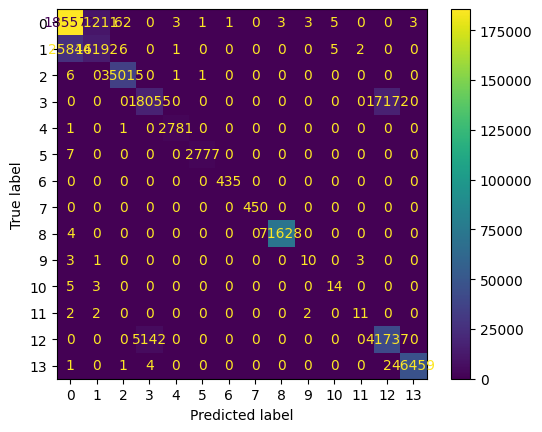

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix on testing set
cm = confusion_matrix(y_test, y_predicted, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [18]:
from sklearn.metrics import fbeta_score

# Calculate F2 score on testing set
fbeta_score(y_test, y_predicted,average=None, beta=2)

array([0.92887898, 0.38229257, 0.99941773, 0.55009171, 0.99906596,
       0.99784405, 0.99954044, 1.        , 0.99994695, 0.60240964,
       0.625     , 0.6547619 , 0.84684308, 0.99984935])

In [19]:
# Test with packets captured from local computer
df_real = pd.read_csv('/kaggle/input/personal-network/input.pcap_Flow.csv')
df_real.drop(["Timestamp", "Flow ID", "Label", "Src IP", "Src Port", "Dst IP"], axis="columns", inplace=True)
df_real = pd.DataFrame(df_real.values, columns=X_test.columns)
y_real = clf.predict(df_real)

print(y_real)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


# Model persistence

## Using skops

In [20]:
!pip install skops

  Obtaining dependency information for skops from https://files.pythonhosted.org/packages/fd/fd/8ee9d18fa13118f4230766cc31fe66846928eca1713b1907ffd61fa86ed3/skops-0.9.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 4.0 MB/s eta 0:00:00


In [21]:
from skops.io import dump

dump(clf, "/kaggle/working/intrusion-classifier.skops")

In [22]:
%cd /kaggle/working
from IPython.display import FileLink

FileLink(r'intrusion-classifier.skops')

/kaggle/working


/kaggle/working/intrusion-classifier.skops

## Using ONXX

In [24]:
# !pip install skl2onnx

  Obtaining dependency information for skl2onnx from https://files.pythonhosted.org/packages/26/80/836824c62ff0923b4c3b8af8332170bdc3ccb469a220535b40405a93b4fb/skl2onnx-1.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for onnxconverter-common>=1.7.0 from https://files.pythonhosted.org/packages/6d/6a/9ed9fd4da34cb41fda35bc5cc9e990c605689db7de63ed84fedbca5a77f6/onnxconverter_common-1.14.0-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the follo

In [28]:
# Convert into ONNX format.
# from skl2onnx import to_onnx

# onx = to_onnx(clf, X_train)
# with open("/kaggle/working/rf_iris.onnx", "wb") as f:
#     f.write(onx.SerializeToString())

RuntimeError: For operator SklearnRandomForestClassifier (type: SklearnRandomForestClassifier), at most 1 input(s) is(are) supported but we got 78 input(s) which are ['Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts_s', 'Flow_Pkts_s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts_s', 'Bwd_Pkts_s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down_Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg', 'Fwd_Byts_b_Avg', 'Fwd_Pkts_b_Avg', 'Fwd_Blk_Rate_Avg', 'Bwd_Byts_b_Avg', 'Bwd_Pkts_b_Avg', 'Bwd_Blk_Rate_Avg', 'Subflow_Fwd_Pkts', 'Subflow_Fwd_Byts', 'Subflow_Bwd_Pkts', 'Subflow_Bwd_Byts', 'Init_Fwd_Win_Byts', 'Init_Bwd_Win_Byts', 'Fwd_Act_Data_Pkts', 'Fwd_Seg_Size_Min', 'Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min', 'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min']

In [ ]:
# Compute the prediction with onnxruntime.
# import onnxruntime as rt

# sess = rt.InferenceSession("/kaggle/working/rf_iris.onnx", providers=["CPUExecutionProvider"])
# input_name = sess.get_inputs()[0].name
# label_name = sess.get_outputs()[0].name
# pred_onx = sess.run([label_name], {input_name: df_real.astype(np.float32)})[0]

## Using joblib

In [29]:
from joblib import dump, load
dump(clf, '/kaggle/working/intrusion-classifier.joblib') 

['/kaggle/working/intrusion-classifier.joblib']

In [30]:
jl = load('/kaggle/working/intrusion-classifier.joblib')
print(jl.predict(df_real))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


In [31]:
%cd /kaggle/working
from IPython.display import FileLink

FileLink(r'intrusion-classifier.joblib')

/kaggle/working


/kaggle/working/intrusion-classifier.joblib